In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
heart_statlog = pd.read_csv("C:/Users/icadm/Downloads/dataset_53_heart-statlog.csv")


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

Heart_Disease = pd.get_dummies(heart_statlog['class'], drop_first=True)


In [4]:
heart_statlog = pd.concat([heart_statlog, Heart_Disease], axis=1)

heart_statlog.drop('class', axis=1, inplace=True)

y = heart_statlog.present.copy() # copy "y" column values out

X = heart_statlog.drop(['present'], axis=1) # drop y column

X.drop(['serum_cholestoral'], axis=1, inplace=True) # dropping unnecessary columns

X.drop(['chest'], axis=1, inplace=True)

X.drop(['fasting_blood_sugar'], axis=1, inplace=True)

X.drop(['resting_electrocardiographic_results'], axis=1, inplace=True)

X.drop(['exercise_induced_angina'], axis=1, inplace=True)

X.drop(['oldpeak'], axis=1, inplace=True)

X.drop(['slope'], axis=1, inplace=True)

X.drop(['number_of_major_vessels'], axis=1, inplace=True)

X.drop(['thal'], axis=1, inplace=True)

optimal_hr_min = X['maximum_heart_rate_achieved'].apply(lambda x: x*0.5)   # finding the minimum of the optimal HR

optimal_hr_max = X['maximum_heart_rate_achieved'].apply(lambda x: x*0.85)   # finding the maximum of the optimal HR

X = pd.concat([X, optimal_hr_min, optimal_hr_max], axis=1)

X.columns = ['age', 'sex', 'resting_blood_pressure', 'maximum_heart_rate_achieved', 'optimal_hr_min', 'optimal_hr_max']

X['hr_range'] = X['optimal_hr_max'] - X['optimal_hr_min']

Iteration 1, loss = inf
Iteration 2, loss = 61.00613294
Iteration 3, loss = 16.08155985
Iteration 4, loss = 8.46120206
Iteration 5, loss = 3.45023395
Iteration 6, loss = 2.23249897
Iteration 7, loss = 1.03434463
Iteration 8, loss = 0.79758728
Iteration 9, loss = 4.37720893
Iteration 10, loss = 3.22445879
Iteration 11, loss = 0.71105228
Iteration 12, loss = 1.19608165
Iteration 13, loss = 0.67648525
Iteration 14, loss = 0.64845500
Iteration 15, loss = 0.69072942
Iteration 16, loss = 0.69264922
Iteration 17, loss = 0.70006069
Iteration 18, loss = 1.47798799
Iteration 19, loss = 0.64086182
Iteration 20, loss = 1.18321006
Iteration 21, loss = 1.21641674
Iteration 22, loss = 0.63178587
Iteration 23, loss = 1.14561772
Iteration 24, loss = 0.91613090
Iteration 25, loss = 0.63511201
Iteration 26, loss = 0.64565455
Iteration 27, loss = 0.63176599
Iteration 28, loss = 0.62646255
Iteration 29, loss = 0.68228562
Iteration 30, loss = 0.71696306
Iteration 31, loss = 0.61832289
Iteration 32, loss = 0

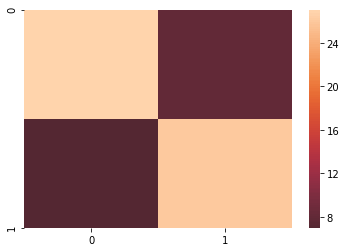

              precision    recall  f1-score   support

           0       0.79      0.77      0.78        35
           1       0.76      0.79      0.78        33

    accuracy                           0.78        68
   macro avg       0.78      0.78      0.78        68
weighted avg       0.78      0.78      0.78        68



In [6]:

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



y = heart_statlog['present']
x = heart_statlog.drop(['present'], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)

clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)


clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
cm

sns.heatmap(cm, center=True)
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))